# Homework 1 Rosini Micol

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations

In [2]:
# Utils cell


# Define a function to assign feature 'capacity' to every edge
def init_capacities(G, capacities):
    for (a,b), capacity in zip(capacities.keys(), capacities.values()):
        G[a][b]['capacity'] = capacity
        

# Define a function to init edges' labels with their capacity        
def assign_labels_capacities(capacities):
    d = {}
    for k,cap in zip(capacities.keys(), capacities.values()):
            d[k] = f"c = {cap}"
    return d
        
# Define a function to state if a perfect matching exist
def exist_perfect_matching(G, V_0, V_1):
      
    for k in range(len(V_0)):

        for w in range(k+1, len(V_0)+1):
            people = V_0[k:w] # Take all the possible combination of node of V_0 
            neighbour = set() # List of all the neighbour of people, i.e., the books of interest
            
            for i in people:

                for j in V_1:
                    if (i,j) in list(G.edges()) or (j,i)  in list(G.edges()): # if the edge (i,j) exists
                        neighbour.add(j)# Add the node j to the list of neighbour

            if len(neighbour) < len(people): # if |N_s| < |U| where U = any partition of V_0
                        return False

    return True

# Define a function to find the perfect matching
def perfect_matching(G, o , d):
    
    flow, flow_distribution = nx.algorithms.flow.maximum_flow(G, o, d)
    
    dict1 = flow_distribution.keys() 
    dict2 = flow_distribution.values() 
    
    perfect_matching = []
    
    for node1 in dict1:
        dict2 = flow_distribution[node1]
        
        for node2 in dict2:
            
            if dict2[node2] == 1 and node1 != 's' and node2 != 't':
                perfect_matching.append((node1,node2)) 
            
    return perfect_matching



## Exercise 2
There are a set of people $\{p_1, p_2, p_3, p_4\}$ and a set of books $\{b_1, b_2, b_3, b_4\}$. Each person is interested in a subset of books, specifically

$p_1$ -> $\{b_1, b_2\}$,\
$p_2$ -> $\{b_2, b_3\} $,\
$p_3$ -> $\{b_1, b_4 \} $,\
$p_4$ -> $\{b_1,b_2, b_4\} $

Let's represent this problem with a bipartite graph where the nodes represent the people and the books, and the edges the interest of a specific person to a specific book:

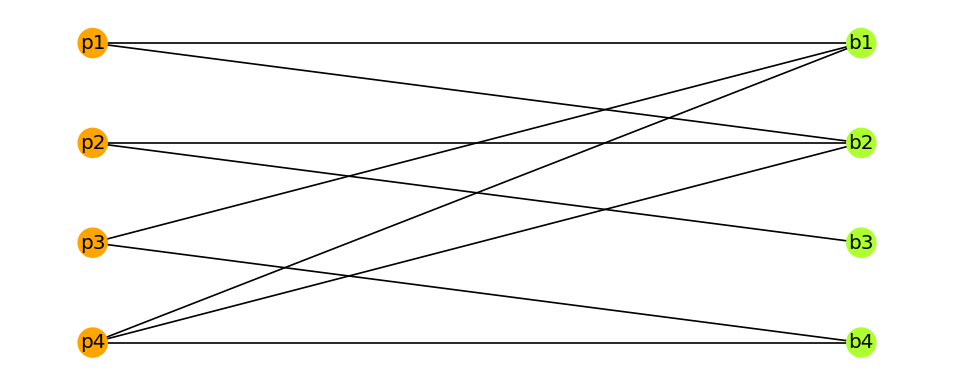

In [3]:
fig, ax = plt.subplots(figsize = (10,4), dpi=120)
G = nx.Graph()
G.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4')])

pos = {'p1':[0,2], 'p2':[0,1],'p3':[0,0],'p4':[0,-1],'b1':[2,2], 'b2':[2,1],'b3':[2,0],'b4':[2,-1]}


left_nodes = ['p1', 'p2', 'p3','p4']
node_color = ['orange' if x in left_nodes else 'greenyellow' for x in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color = node_color, ax= ax)

plt.savefig('fig/graph5.png')


### Question a 
Exploit max-flow problems to find a perfect matching (if any)

***Solution***

A matching $M$ in $G$ is perfect for a specific partition of node $V$ if every node in $V$ is matched in $M$

In this case we have a bipartite graph with

$$V_0 = \{p_1, p_2, p_3, p_4\}, V_1 = \{b_1, b_2, b_3, b_4\}$$


The theory states that for a simple bipartite graph $G = (V,E)$, in order to have a perfect matching for a partition $V_0 \subseteq V$ , the cardinality of every subset $U$ of $V_0$ must be:


$$
|\mathcal{U}| \le |\mathcal{N}_{\mathcal{U}}| \quad \forall \mathcal{U} \subseteq V_0,
$$

where
$$
\mathcal{N}_{\mathcal{U}} = \sum_{i \in \mathcal{U}} \mathcal{N}_i
$$


is the neighborhood of $\mathcal{U}$ in $G$.
This is the ***Hall's marriage theorem***.


Note that a perfect matching (both for $V_0$ and $V_1$) can exist only if $|V_0|=|V_1|$.

To verify that a perfect matching exists, one could verify the sufficient and necessary condition in Hall's marriage theorem. We can implement the following algorithm that automatically tells you if a perfect matching exist given a bipartite graph.

In [4]:
# Code to verify if a perfect matching exist with the Hall's marriage theorem
V_0 = [] # List of people
V_1 = [] # List of books
for n in G.nodes():
    if n in left_nodes:
        V_0.append(n) 
    else:
        V_1.append(n)



if exist_perfect_matching(G, V_0, V_1): 
    print( 'A V_0-perfect matching can exist')
else:
    print( 'A V_0-perfect matching cannot exist')
    
    
if exist_perfect_matching(G, V_1, V_0):
    print( 'A V_1-perfect matching can exist')
else:
    print( 'A V_1-perfect matching cannot exist')
    

      

A V_0-perfect matching can exist
A V_1-perfect matching can exist


But there is also an analogy between maximal flows and perfect matching. 

In order to use this analogy we need to modify our graph. We start by adding a source node $s$ and a tail node $t$ to our graph. 
Then, we add directed edges from the source $s$ to all the node-partition $V_0$, and from all the node-partition $V_1$ to the tail $t$.

Then, for every undirected edge $(i,j)$ in $G$, we transform it in a directed one $(i,j)$ where $i \in V_0$ and $j \in V_1$

The graph now is directed, and we set all the edges with capacity $c=1$. We call this graph $G1$

***A $V_0$-perfect matching on $G$ exists if and only if it there exists a flow with throughput $|V_0|$ on the network $G1$.*** 

Moreover, given a node $i \in |V_0|$, if a $|V_0|$-perfect matching exists, then there exists $k \in V_1$ such that

$$
f_{(i,j)} = 
\begin{cases}
1 \quad \text{if} \ j = k \\
0 \quad \text{otherwise}
\end{cases}
$$

Thus, given a maximum flow with throughput $|V_0|$, the associated $V_0$-perfect matching can be found by selecting all the edges $(i,j)$ ($i \in V_0, j \in V_1$) such that $f_{(i,j)}=1$.



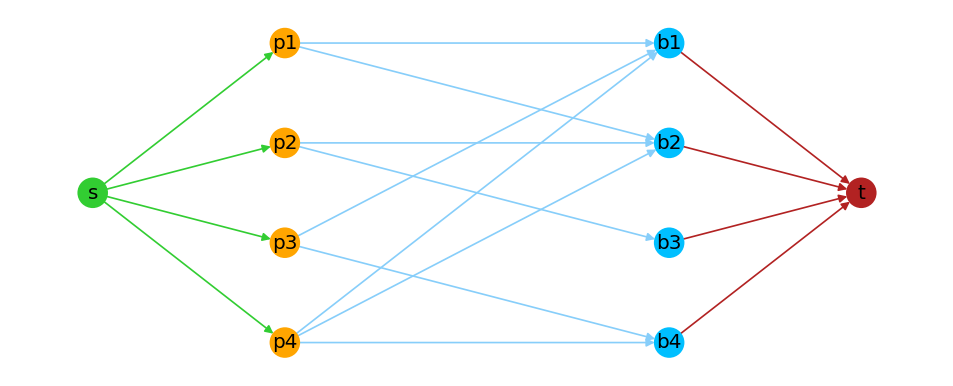

In [5]:
fig, ax = plt.subplots(figsize = (10,4), dpi=120)


G1 = nx.DiGraph()
G1.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4')])
G1.add_edges_from([('s','p1'),('s','p2'),('s','p3'), ('s','p4'), ('b1','t'), ('b2','t'), ('b3','t'), ('b4', 't')])
pos = {'p1':[0,2], 'p2':[0,1],'p3':[0,0],'p4':[0,-1],'b1':[2,2], 'b2':[2,1],'b3':[2,0],'b4':[2,-1], 's':[-1,0.5], 't': [3,0.5]}


edge_color = ['limegreen' if 's' in (x, y) else 'firebrick' if 't' in (x, y) else 'lightskyblue' for (x,y) in G1.edges()]
node_color = ['orange' if x in left_nodes else 'limegreen' if x == 's' else 'firebrick' if x == 't'  else 'deepskyblue' for x in G1.nodes()]




nx.draw(G1, pos, with_labels=True, edge_color = edge_color, node_color = node_color)

plt.savefig('fig/graph6.png')



We now assign the capacity to each edges

In [6]:
for (a,b) in G1.edges():
    G1[a][b]['capacity'] = 1
    

Then, the maximum flow that can be send on G1 is :

In [7]:
flow, flow_distribution = nx.algorithms.flow.maximum_flow(G1, 's','t')
print('The maximum flow that can be send on G1 is:', flow) 
print('\nAnd it can be obtained with the following flow distribution:', flow_distribution )


if flow == len(V_0):
    print('\nA V0 perfect matching can exist ')
    
        
if flow == len(V_1):
    print('A V1 perfect matching can exist ')
    
# a perfect matching both for V_0 and V_1 can exist only if the cardinality of V0 is equal to the cardinality of V1
if len(V_0) == len(V_1):
    print('A perfect matching both for V_0 and V_1 can exist')





The maximum flow that can be send on G1 is: 4

And it can be obtained with the following flow distribution: {'p1': {'b1': 0, 'b2': 1}, 'b1': {'t': 1}, 'b2': {'t': 1}, 'p2': {'b2': 0, 'b3': 1}, 'b3': {'t': 1}, 'p3': {'b1': 1, 'b4': 0}, 'b4': {'t': 1}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 's': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 't': {}}

A V0 perfect matching can exist 
A V1 perfect matching can exist 
A perfect matching both for V_0 and V_1 can exist


Let's find a perfect matching:

The perfect matching is : [('p1', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p4', 'b4')]


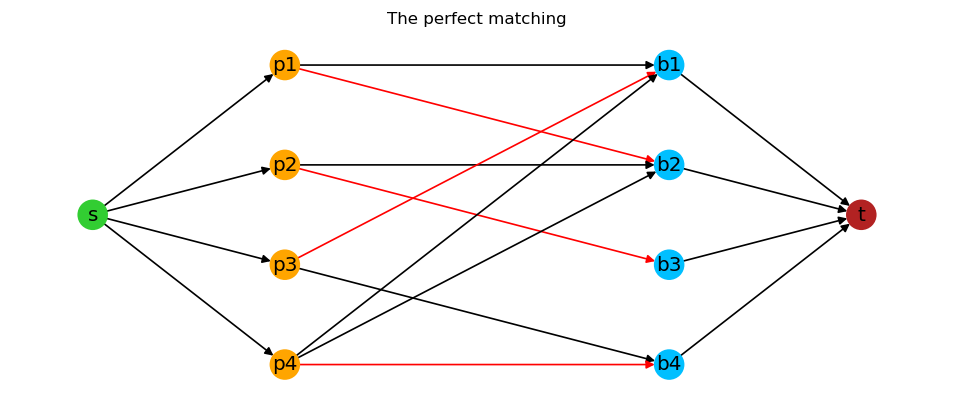

In [8]:
perfect_matching1 = perfect_matching(G1, 's' , 't')
print('The perfect matching is :' , perfect_matching1 )


fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = ['red' if (x,y) in perfect_matching1 else 'black' for (x,y) in G1.edges()]


nx.draw(G1, pos, with_labels=True, edge_color = edge_color, node_color = node_color)


ax.set_title("The perfect matching", fontsize=10)

plt.savefig('fig/graph7.png')








### Question b
Assume now that there are multiple copies of books, and the distribution of the number of copies is $(2,3,2,2)$. Each person can take an arbitrary number of different books. Exploit the analogy with max-flow problems to establish how many books of interest can be assigned in total.


***Solution***

In this case the perfect matching for both people and books can exist only if the copies of each book available are equal to the number of people that have a preference for that specific book

$$ |  \textit{ available copies of book i}| = |  \textit{ people interested in book i}|\\ 
\forall \textit{i} = 1,2,3,4
$$


in this case it will be perfect if all the people satisfies all their preference and all the available copies are taken.


A matching will be ***perfect*** for the ***set of people*** if each person satisfy all his preferences, i.e., if he can take all the books he is interested in.


For the ***set of books*** a matching will be ***perfect*** if all the available copies are taken.


We can see that the number of people interested in book 1 is 3, but the available copies for that specific book are just 2. In this case a perfect matching for the set of people cannot exist since there aren't enough copies of book 1. On the other hand, we have 2 copies of book 3 and just 1 person interested in it, so it is impossible that all the copies of all the possible books will be taken. Also in this case, a perfect matchin for the set of books cannot exist.

To find out if the perfect mathing exists, the capacity of some edges and the throughput  must be modified since more than one choice is possible in this case.

1. All the capacities of the edges from $s$ to the set of people will be equal to the number of preferences of each different person since all the people can take an arbitrary number of different book that prefers; 


2. All the edges from the set of people to the set of books have capacity $c = 1$ since a person can take just one copy of the same book;



3. The edges from the set of books to $t$ will be set with the capacity $c$ equals to the number of copies that are available for that specific book.



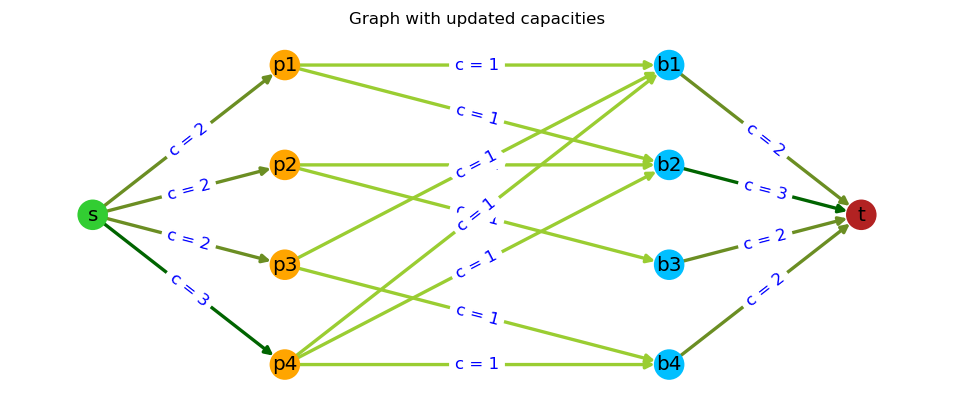

In [9]:
G1['s']['p1']['capacity'] = 2
G1['s']['p2']['capacity'] = 2
G1['s']['p3']['capacity'] = 2
G1['s']['p4']['capacity'] = 3

G1['b1']['t']['capacity']= 2
G1['b2']['t']['capacity']= 3
G1['b3']['t']['capacity']= 2
G1['b4']['t']['capacity']= 2

capacities = {}

for (a,b) in G1.edges():
    capacities[(a,b)] = G1[a][b]['capacity']

    
edge_labels = assign_labels_capacities(capacities)
edge_color = ['yellowgreen' if G1[a][b]['capacity']== 1 else 'olivedrab' if G1[a][b]['capacity']== 2 else 'darkgreen' for (a,b) in G1.edges()]

fig, ax = plt.subplots(figsize = (10,4), dpi=120)
nx.draw(G1, pos, with_labels=True,  edge_color = edge_color, node_color = node_color,width = 2.0, ax = ax)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_color='blue',  ax=ax)

ax.set_title("Graph with updated capacities", fontsize=10)

plt.savefig('fig/graph8.png')


The number of book of interest that can be assigned in total is: 8
And this is one of the possible matching : [('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')]


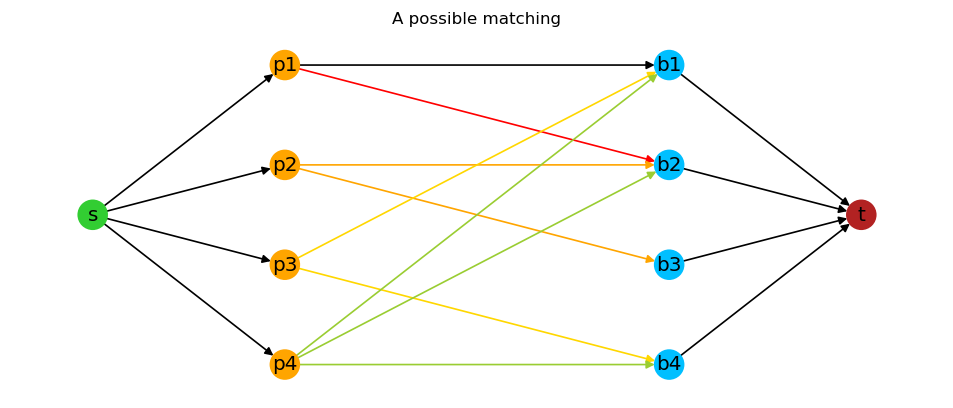

In [10]:
flow,flow_distribution = nx.algorithms.flow.maximum_flow(G1, 's','t')
pm = perfect_matching(G1, 's', 't') # Return in this case one of the possible perfect mtaching
number_of_book = len(pm)
print('The number of book of interest that can be assigned in total is:', number_of_book)
print('And this is one of the possible matching :',pm)

fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = ['red' if (x,y) in pm and x == 'p1' else 'orange' if (x,y) in pm and x == 'p2'else 'gold' if (x,y) in pm and x == 'p3' else 'yellowgreen' if (x,y) in pm and x == 'p4' else 'black' for (x,y) in G1.edges()]


nx.draw(G1, pos, with_labels=True, edge_color = edge_color, node_color = node_color)


ax.set_title("A possible matching", fontsize=10)

plt.savefig('fig/graph9.png')



### Question c

Suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?

***Solution***
We can see from the above graph that $p_1$ wanted $b_1$ copy, but he couldn't obtain it since there aren't enough copies. Instead book $b_3$, which had 2 copies, still has one copy left that is not taken by any people. So the library should sell one copy of $b_3$ and buy one of $b_1$\
We can check this with an algorithm:

In [11]:
def find_book_tochange(G, books):
    i = 1 # No books need some changes
    
    for book in V_1:
        
        if G.in_degree(book) != G[book]['t']['capacity']: # If the interest of that book is different from the number of the copies
            i += 1
            n = G.in_degree(book) - G[book]['t']['capacity'] 
            if n > 1:
                print('The library should buy',n,'more copies of book', book)
            elif n == 1:
                print('The library should buy',n,'more copy of book', book)
            elif n < -1:
                print('The library should sell',-n,'copies of book', book)
            else:    
                print('The library should sell',-n,'copy of book', book)
            G[book]['t']['capacity'] +=  n #Update capacities
    if i == 1:
        print('No more books must be bought or sold')
        
init_capacities(G1,capacities) # To avoid other changes of capacities                
find_book_tochange(G1,V_1)    

The library should buy 1 more copy of book b1
The library should sell 1 copy of book b3


With these change the graph capacity have been updated and the graph will become:

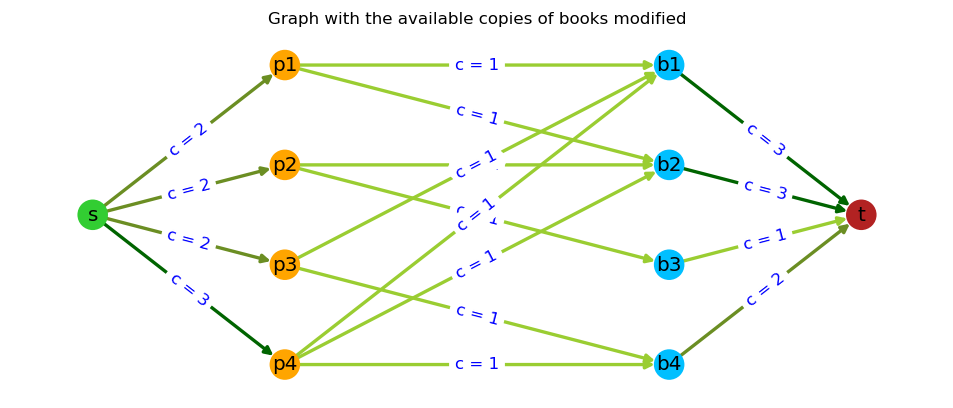

In [12]:
capacities = {}

for (a,b) in G1.edges():
    capacities[(a,b)] = G1[a][b]['capacity']

    
edge_labels = assign_labels_capacities(capacities)
edge_color = ['yellowgreen' if G1[a][b]['capacity']== 1 else 'olivedrab' if G1[a][b]['capacity']== 2 else 'darkgreen' for (a,b) in G1.edges()]

fig, ax = plt.subplots(figsize = (10,4), dpi=120)
nx.draw(G1, pos, with_labels=True,  edge_color = edge_color, node_color = node_color,width = 2.0, ax = ax)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_color='blue',  ax=ax)

ax.set_title("Graph with the available copies of books modified", fontsize=10)

plt.savefig('fig/graph10.png')

In [13]:
new_pm = perfect_matching(G1, 's', 't')
print('The number of book that can be assigned in total is:', len(new_pm))
print('The perfect matching is:\n', new_pm)

The number of book that can be assigned in total is: 9
The perfect matching is:
 [('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')]


We can see that now the number of book that can be assigned in total is 9, that correspond to the sum over all books of all the available copies, i.e., the sum of all the capacities $c$ of the set of books.
Furthermore, the matching that we have obtained is perfect since all the people have all their books of interest and all the copies of books are assigned.